# K-Means

esto es clustering, no clasificacion, es parecido pero diferente, en clustering solo se agrupa por cercania los puntos, en cambio en clasificacion se usaban puntos de entrenamiento para enseñarle al modelo en que lugares debia clasificar que puntos.  
Aqui no necesitamos entrenar a los datos ni tener un conjunto de datos con su clasificacion verdadera, solo debemos aplicar un clustering y los datos se agruparán dependiendo de la distancia entre los puntos y el número de clusters que impusimos.  


dato de vital importancia: en k-means hay que poner previamente los puntos iniciales de los centros, pero eso ya es establecer un criterio con posibles errores en el modelo, esto lo arregla el modelo k-means++, donde el modelo decide donde poner los puntos iniciales.  
  
otro dato: hay que decidir cuantos subgrupos (clusters) vamos a crear, esto se decide con la suma de los cuadrados de la distancia hacia el centro del cluster (wcss). Al aumentar el número de clusters siempre disminuye el wcss, pero tenemos que parar de crear nuevos clusters cuando ya no disminuya significativamente.  
  
![wcss](../../assets/wcssGrafico.png)

![tecnica del codo](../../assets/tecnicaCodo.png)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
x = df.iloc[:, [3, 4]].values

In [28]:
from sklearn.cluster import KMeans

In [29]:
# antes de empezar vamos a ver cual es el numero de clusters que vamos a usar con el método del codo, esto no es exacto, solo es un acercamiento, pero es la mejor
# forma que tenemos
wcss = [] # w-algo clusters square sum
for i in range(1, 11): # quiero calcular los primeros 10 (es un número aleatorio, podría calcular menos o más opciones)
    kmeans = KMeans(n_clusters=i, # esto hace que varien el numero de clusters
                    init="k-means++", # init = k-means++ es la forma de encontrar los mejores centros para empezar con el proceso de kmeans 
                    max_iter=300, # pa que termine de iterar en algun punto y no se quede pegado
                    random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # añade a la lista wcss el valor de wcss del kmeans i
wcss

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793372,
 37265.86520484346,
 30259.657207285465,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124]

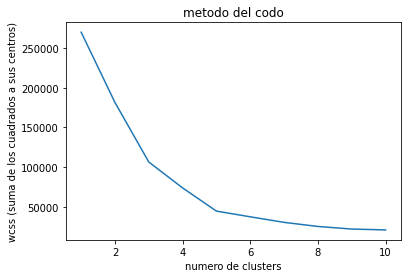

In [30]:
# graficamos el valor de wcss del kmeans dependiendo del número de clusters
plt.plot(range(1, 11), wcss)
plt.title("metodo del codo")
plt.xlabel("numero de clusters")
plt.ylabel("wcss (suma de los cuadrados a sus centros)")
plt.show()


no es exacto, y no es definitivo, pero podemos ver que al llegar a 5 clusters ya no baja mucho más la distancia de los puntos al cuadrado hasta su respectivo centro, asi que asumimos que hay 5 grupos

In [31]:
# realizamos el metodo de kmeans con el numero de clusters optimo obtenido por el metodo del codo
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, random_state=0)
y_pred = kmeans.fit_predict(x)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

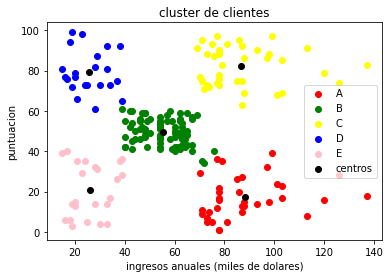

In [37]:
# grafico todos los grupos de diferentes colores y etiquetas
plt.scatter(x[y_pred==0, 0], x[y_pred==0, 1], c="red", label="A")
plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], c="green", label="B")
plt.scatter(x[y_pred==2, 0], x[y_pred==2, 1], c="yellow", label="C")
plt.scatter(x[y_pred==3, 0], x[y_pred==3, 1], c="blue", label="D")
plt.scatter(x[y_pred==4, 0], x[y_pred==4, 1], c="pink", label="E")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c="black", label="centros")
plt.title("cluster de clientes")
plt.xlabel("ingresos anuales (miles de dolares)")
plt.ylabel("puntuacion")
plt.legend()
plt.show()